# <font color=green>01 - Naive Bayesian - Binary - Lab </font>

===Task===

* [x] Generate a 2 class data using sklearn.
* [x] Put Gaussian Naive Binary Classification into class
* [x] Fit the model on the data then calculate accuracy accordingly.

## <font color=green>1. Generate Data</font>

In [1]:
# Import stuff
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# useful stuff
from IPython.display import Markdown, display

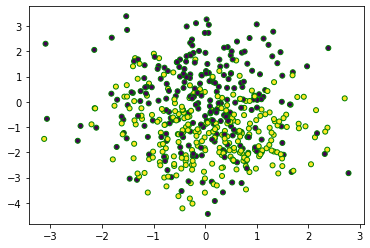

In [2]:
X, y = make_classification(n_samples=500, 
                           n_features=10, 
                           n_redundant=2, 
                           n_informative=4, 
                           n_clusters_per_class=2, 
                           random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='g')


In [10]:
# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## <font color=green>2. Class</font>

In [24]:
class NaiveBinaryClassification():
    
    def __init__(self):
        pass
    
    def fit(self, X_train, y_train):
        self.mean_std(X_train, y_train)
        self.prior(X_train, y_train)
        
    
    def mean_std(self, X_train, y_train):
        n = X_train.shape[1]
        mean = np.zeros((2, n))
        std = np.zeros((2, n))
        
        # Since this is binary it's always two classes
        for label in [0, 1]:
            mean[label, :] = X_train[y_train==label].mean(axis=0)
            std[label, :]  = X_train[y_train==label].std(axis=0)
        self.mean = mean
        self.std = std
        
    def likelihood(self, X_test):
        #guassian pdf for class 0 and 1
        #Note that I am using X_test, since p(x|y) is looking at "new" evidence
        likelihood0 = self.gaussian_pdf(X_test, self.mean[0, :], self.std[0, :])
        likelihood1 = self.gaussian_pdf(X_test, self.mean[1, :], self.std[0, :])

        # P(feature1|class0) * P(feature2|class0)
        self.total_likelihood0 = np.prod(likelihood0, axis=1)

        # P(feature1|class1) * P(feature2|class1)
        self.total_likelihood1 = np.prod(likelihood1, axis=1)
        
    def prior(self, X_train, y_train):
        # probability for class 0 and 1
        m0 = len(X_train[y_train==0])
        m1 = len(X_train[y_train==1])
        self.prior0 = m0 / (m0 + m1)
        self.prior1 = m1 / (m0 + m1)

        assert self.prior0 + self.prior1 == 1, "probability not equal 1"
        
    def posterior(self):
        # P(class0) * P(feature1|class0) * P(feature2|class0)
        self.posterior0 = self.prior0 * self.total_likelihood0    
        # P(class1) * P(feature1|class1) * P(feature2|class1)
        self.posterior1 = self.prior1 * self.total_likelihood1
        
    
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def predict(self, X_test):
        self.likelihood(X_test)
        self.posterior()
        yhat = 1 * self.posterior1 > self.posterior0
        return yhat

In [26]:
model = NaiveBinaryClassification()
model.fit(X_train, y_train)
yhat=model.predict(X_test)

## <font color=green>3. Classification Report</font>

In [27]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.6834428794992176
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.75      0.82      0.78        79
           1       0.78      0.69      0.73        71

    accuracy                           0.76       150
   macro avg       0.76      0.76      0.76       150
weighted avg       0.76      0.76      0.76       150

